# Supervised Learning
- Linear Regression
- Nonlinear Regression

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Linear Regression
# Create a dummy linear dataset with 100 data points
# reshape(-1, 1), result in an array with 1 column and as many rows as necessary to accommodate the data. 
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2
X = X.reshape(-1, 1)

In [4]:
df = pd.DataFrame({'X': X.flatten(), 'y': y})
df.head(10)

,X,y
0,0.000000,1.945152
1,0.101010,3.283324
2,0.202020,2.114149
3,0.303030,4.928699
4,0.404040,4.332544
5,0.505051,6.196424
6,0.606061,2.013092
7,0.707071,3.774922
8,0.808081,2.002341
9,0.909091,3.118179


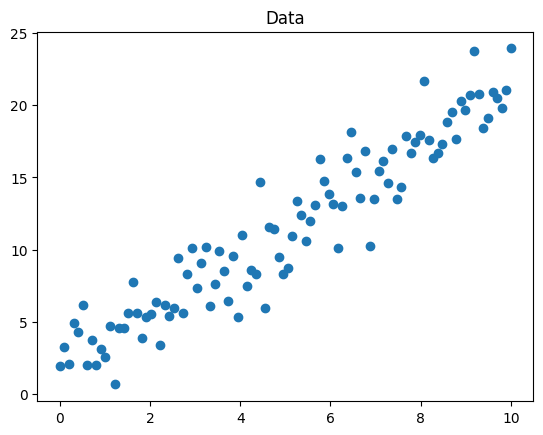

In [5]:
# plot the data
plt.scatter(X, y)
plt.title("Data")
plt.show()

In [6]:
# Create a linear regression model
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Fit the model to the data
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Get the slope and intercept of the line best fit
print("Model coefficient:", model.coef_, "\n")
print("Model intercept:", model.intercept_, "\n")

Model coefficient: [1.94357963] 

Model intercept: 1.7183864446710064 



In [9]:
# Get the prediction results
predicted = model.predict(X)
predicted

array([ 1.71838644,  1.91470762,  2.11102879,  2.30734997,  2.50367114,
        2.69999232,  2.89631349,  3.09263467,  3.28895584,  3.48527702,
        3.68159819,  3.87791937,  4.07424054,  4.27056172,  4.46688289,
        4.66320407,  4.85952524,  5.05584642,  5.25216759,  5.44848877,
        5.64480994,  5.84113112,  6.03745229,  6.23377347,  6.43009464,
        6.62641582,  6.82273699,  7.01905817,  7.21537934,  7.41170051,
        7.60802169,  7.80434286,  8.00066404,  8.19698521,  8.39330639,
        8.58962756,  8.78594874,  8.98226991,  9.17859109,  9.37491226,
        9.57123344,  9.76755461,  9.96387579, 10.16019696, 10.35651814,
       10.55283931, 10.74916049, 10.94548166, 11.14180284, 11.33812401,
       11.53444519, 11.73076636, 11.92708754, 12.12340871, 12.31972989,
       12.51605106, 12.71237224, 12.90869341, 13.10501458, 13.30133576,
       13.49765693, 13.69397811, 13.89029928, 14.08662046, 14.28294163,
       14.47926281, 14.67558398, 14.87190516, 15.06822633, 15.26

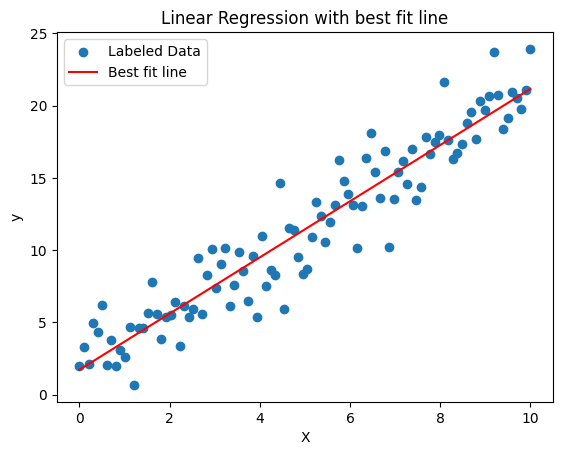

In [10]:
# plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predicted, color='red')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with best fit line")
plt.legend(['Labeled Data', 'Best fit line'])
plt.show()

## Predict the response for a new data point

In [11]:
X_new = np.array([[5.5]])
y_pred = model.predict(X_new)
y_pred

array([12.40807441])

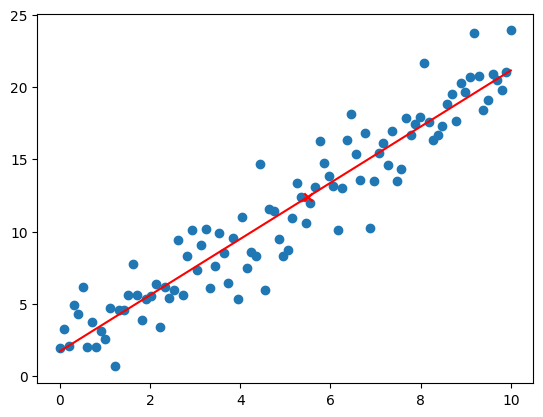

In [12]:

# plot the data and the best fit line and the new data point
plt.scatter(X, y)
plt.plot(X, predicted, color='red',)
plt.scatter(X_new, y_pred, color='red', marker='x')


# plt.text(X_new, y_pred,round(y_pred.item(), 2), fontsize=12, color='red')
# plt.xlabel("X")
# plt.ylabel("y")
# plt.legend(['Labeled Data', 'Best fit line', 'New data point'])
# plt.title("Linear Regression with best fit line and new data point")
# plt.show()

# Let's train a Linear Regression model on a real dataset

In [13]:
df = pd.read_csv('data/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
df.describe().T[['count', 'mean', 'min', 'max']]

,count,mean,min,max
Hours Studied,10000.0,4.9929,1.0,9.0
Previous Scores,10000.0,69.4457,40.0,99.0
Sleep Hours,10000.0,6.5306,4.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,0.0,9.0
Performance Index,10000.0,55.2248,10.0,100.0


In [16]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

## Preprocessing

In [17]:
label_enc = LabelEncoder()

In [18]:
df['Extracurricular Activities'] = label_enc.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [19]:
y = df['Performance Index']
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [20]:
X = df[['Previous Scores', 'Hours Studied', 'Sample Question Papers Practiced', 'Extracurricular Activities']]
X.head()

,Previous Scores,Hours Studied,Sample Question Papers Practiced,Extracurricular Activities
0,99,7,1,1
1,82,4,2,0
2,51,8,2,1
3,52,5,2,1
4,75,7,5,0


In [21]:
scaler=StandardScaler()
scaler.fit(X)
scaled_X=scaler.transform(X)
scaled_X

array([[ 1.70417565,  0.77518771, -1.24975394,  1.01045465],
       [ 0.72391268, -0.38348058, -0.90098215, -0.98965352],
       [-1.06362569,  1.16141048, -0.90098215,  1.01045465],
       ...,
       [ 0.7815752 ,  0.38896495,  0.1453332 ,  1.01045465],
       [ 1.5888506 ,  1.54763324, -1.59852572,  1.01045465],
       [ 0.26261245,  0.77518771, -1.24975394, -0.98965352]],
      shape=(10000, 4))

## Create train and test split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=48)

In [23]:
print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test', len(y_test))

x_train:  8000
x_test:  2000
y_train:  8000
y_test 2000


In [24]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Train the model on training data

In [25]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Make prediction on the testing data

In [26]:
y_test_pred = model.predict(x_test)

In [27]:
r2_score = r2_score(y_test, y_test_pred)
r2_score

0.9869772324768298

In [28]:
print("R2 = ", int(r2_score * 100),'%')

R2 =  98 %


In [29]:
mean_squared_error(y_test, y_test_pred)

4.77523845165873